baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}


No handles with labels found to put in legend.


                         high       low      open  volumefrom     volumeto     close conversionType conversionSymbol
time                                                                                                                
2021-09-21 03:00:00  42959.86  42589.24  42915.89      902.59  38620395.61  42690.17         direct                 
2021-09-21 04:00:00  42874.63  42312.80  42690.17     1159.25  49286457.14  42438.99         direct                 
2021-09-21 05:00:00  42732.37  42184.73  42438.99     1259.35  53417527.81  42553.03         direct                 
2021-09-21 06:00:00  43062.41  42553.03  42553.03     1239.83  53104243.04  42877.15         direct                 
2021-09-21 07:00:00  43329.34  42769.23  42877.15     1345.67  57969256.04  43300.19         direct                 
...                       ...       ...       ...         ...          ...       ...            ...              ...
2021-11-01 15:00:00  61620.14  61432.79  61481.01      995.08  6

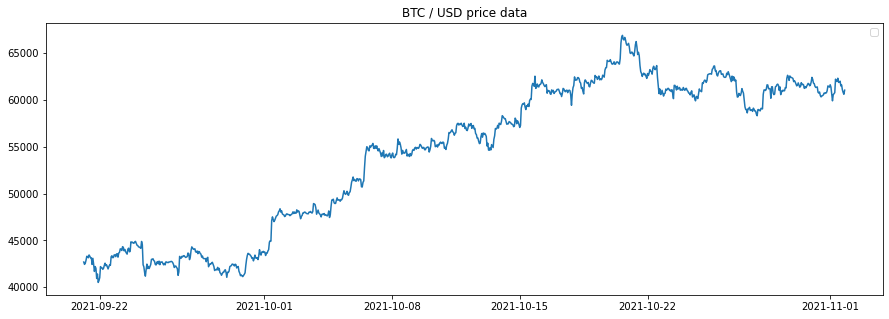

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False) 

def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'minute', limit=20000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 

    return data  

def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df)
    
    return df

def plot_data(df, cryptocurrency, target_currency):
    # got his warning because combining matplotlib 
    # and time in pandas converted from epoch to normal date
    # To register the converters:
    # 	>>> from pandas.plotting import register_matplotlib_converters
    # 	>>> register_matplotlib_converters()
    #  warnings.warn(msg, FutureWarning)
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None    

cryptocurrency = 'BTC'
target_currency = 'USD'

data = get_hist_data(cryptocurrency, target_currency, 'hour', 1000)
df = data_to_dataframe(data)
df.to_csv('cryptodata.csv')
plot_data(df, cryptocurrency, target_currency)

baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}


No handles with labels found to put in legend.


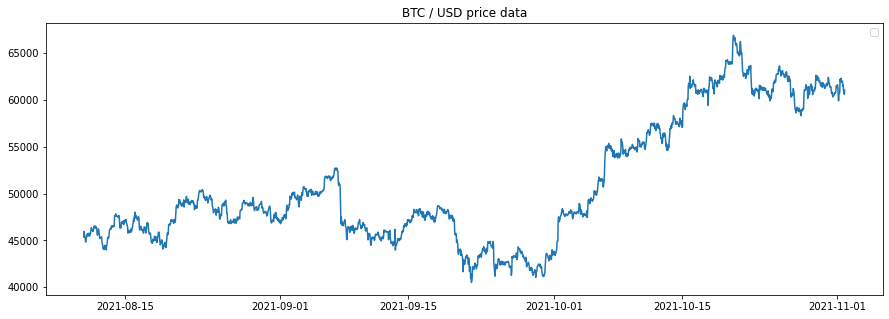

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False) 

def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'minute', limit=40000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 

    return data  

def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    
    return df

def plot_data(df, cryptocurrency, target_currency):
    # got his warning because combining matplotlib 
    # and time in pandas converted from epoch to normal date
    # To register the converters:
    # 	>>> from pandas.plotting import register_matplotlib_converters
    # 	>>> register_matplotlib_converters()
    #  warnings.warn(msg, FutureWarning)
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None    

cryptocurrency = 'BTC'
target_currency = 'USD'

data = get_hist_data(cryptocurrency, target_currency, 'hour', 2000)
df = data_to_dataframe(data)
df.to_csv('kuchbhi.csv')
plot_data(df, cryptocurrency, target_currency)